### Setup

In [1]:
# !pip install -q numpy pandas matplotlib seaborn scikit-learn

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 120


### Load Data

In [2]:
# Upload or set path to your WDBC.csv file
# from google.colab import files
# uploaded = files.upload()
# data_path = list(uploaded.keys())[0]

data_path = "/content/WDBC.csv"  # Set manually if file is already uploaded
df = pd.read_csv(data_path)
df.head(10)


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Drop ID and Show Info

In [3]:
# Drop ID column
df_cols_lower = [c.lower() for c in df.columns]
if "id" in df_cols_lower:
    id_col = df.columns[df_cols_lower.index("id")]
    df.drop(columns=[id_col], inplace=True)

# Info
buf = io.StringIO()
df.info(buf=buf)
print(buf.getvalue())

# Describe
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosis                 569 non-null    object 
 1   radius_mean               569 non-null    float64
 2   texture_mean              569 non-null    float64
 3   perimeter_mean            569 non-null    float64
 4   area_mean                 569 non-null    float64
 5   smoothness_mean           569 non-null    float64
 6   compactness_mean          569 non-null    float64
 7   concavity_mean            569 non-null    float64
 8   concave points_mean       569 non-null    float64
 9   symmetry_mean             569 non-null    float64
 10  fractual dimension_mean   569 non-null    float64
 11  radius_se                 569 non-null    float64
 12  texture_se                569 non-null    float64
 13  perimeter_se              569 non-null    float64
 14  area_se   

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


### Encode Diagnosis and plot distribution

Diagnosis column: Diagnosis
Diagnosis
0    357
1    212
Name: count, dtype: int64


/tmp/ipython-input-1555720089.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[diag_col] = df[diag_col].replace({"B": 0, "M": 1, "benign": 0, "malignant": 1})


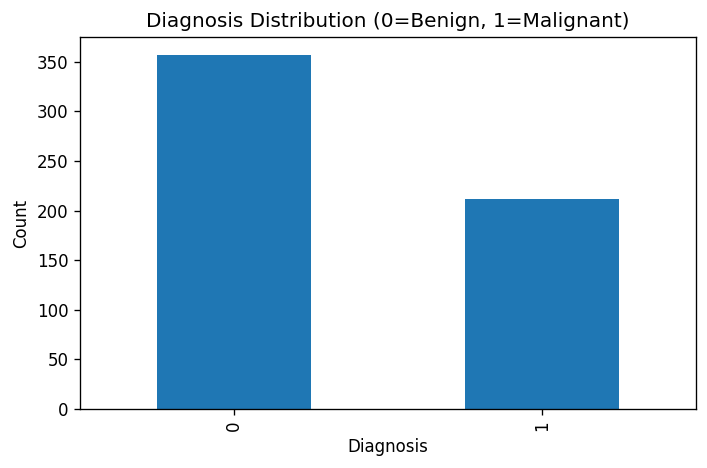

In [4]:
# Detect and encode diagnosis
diag_col = [c for c in df.columns if c.lower() in ["diagnosis", "target", "label"]][0]
print("Diagnosis column:", diag_col)

df[diag_col] = df[diag_col].replace({"B": 0, "M": 1, "benign": 0, "malignant": 1})
y = df[diag_col].astype(int)

print(y.value_counts())

# Plot class distribution
y.value_counts().sort_index().plot(kind="bar")
plt.title("Diagnosis Distribution (0=Benign, 1=Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Boxplot of all features

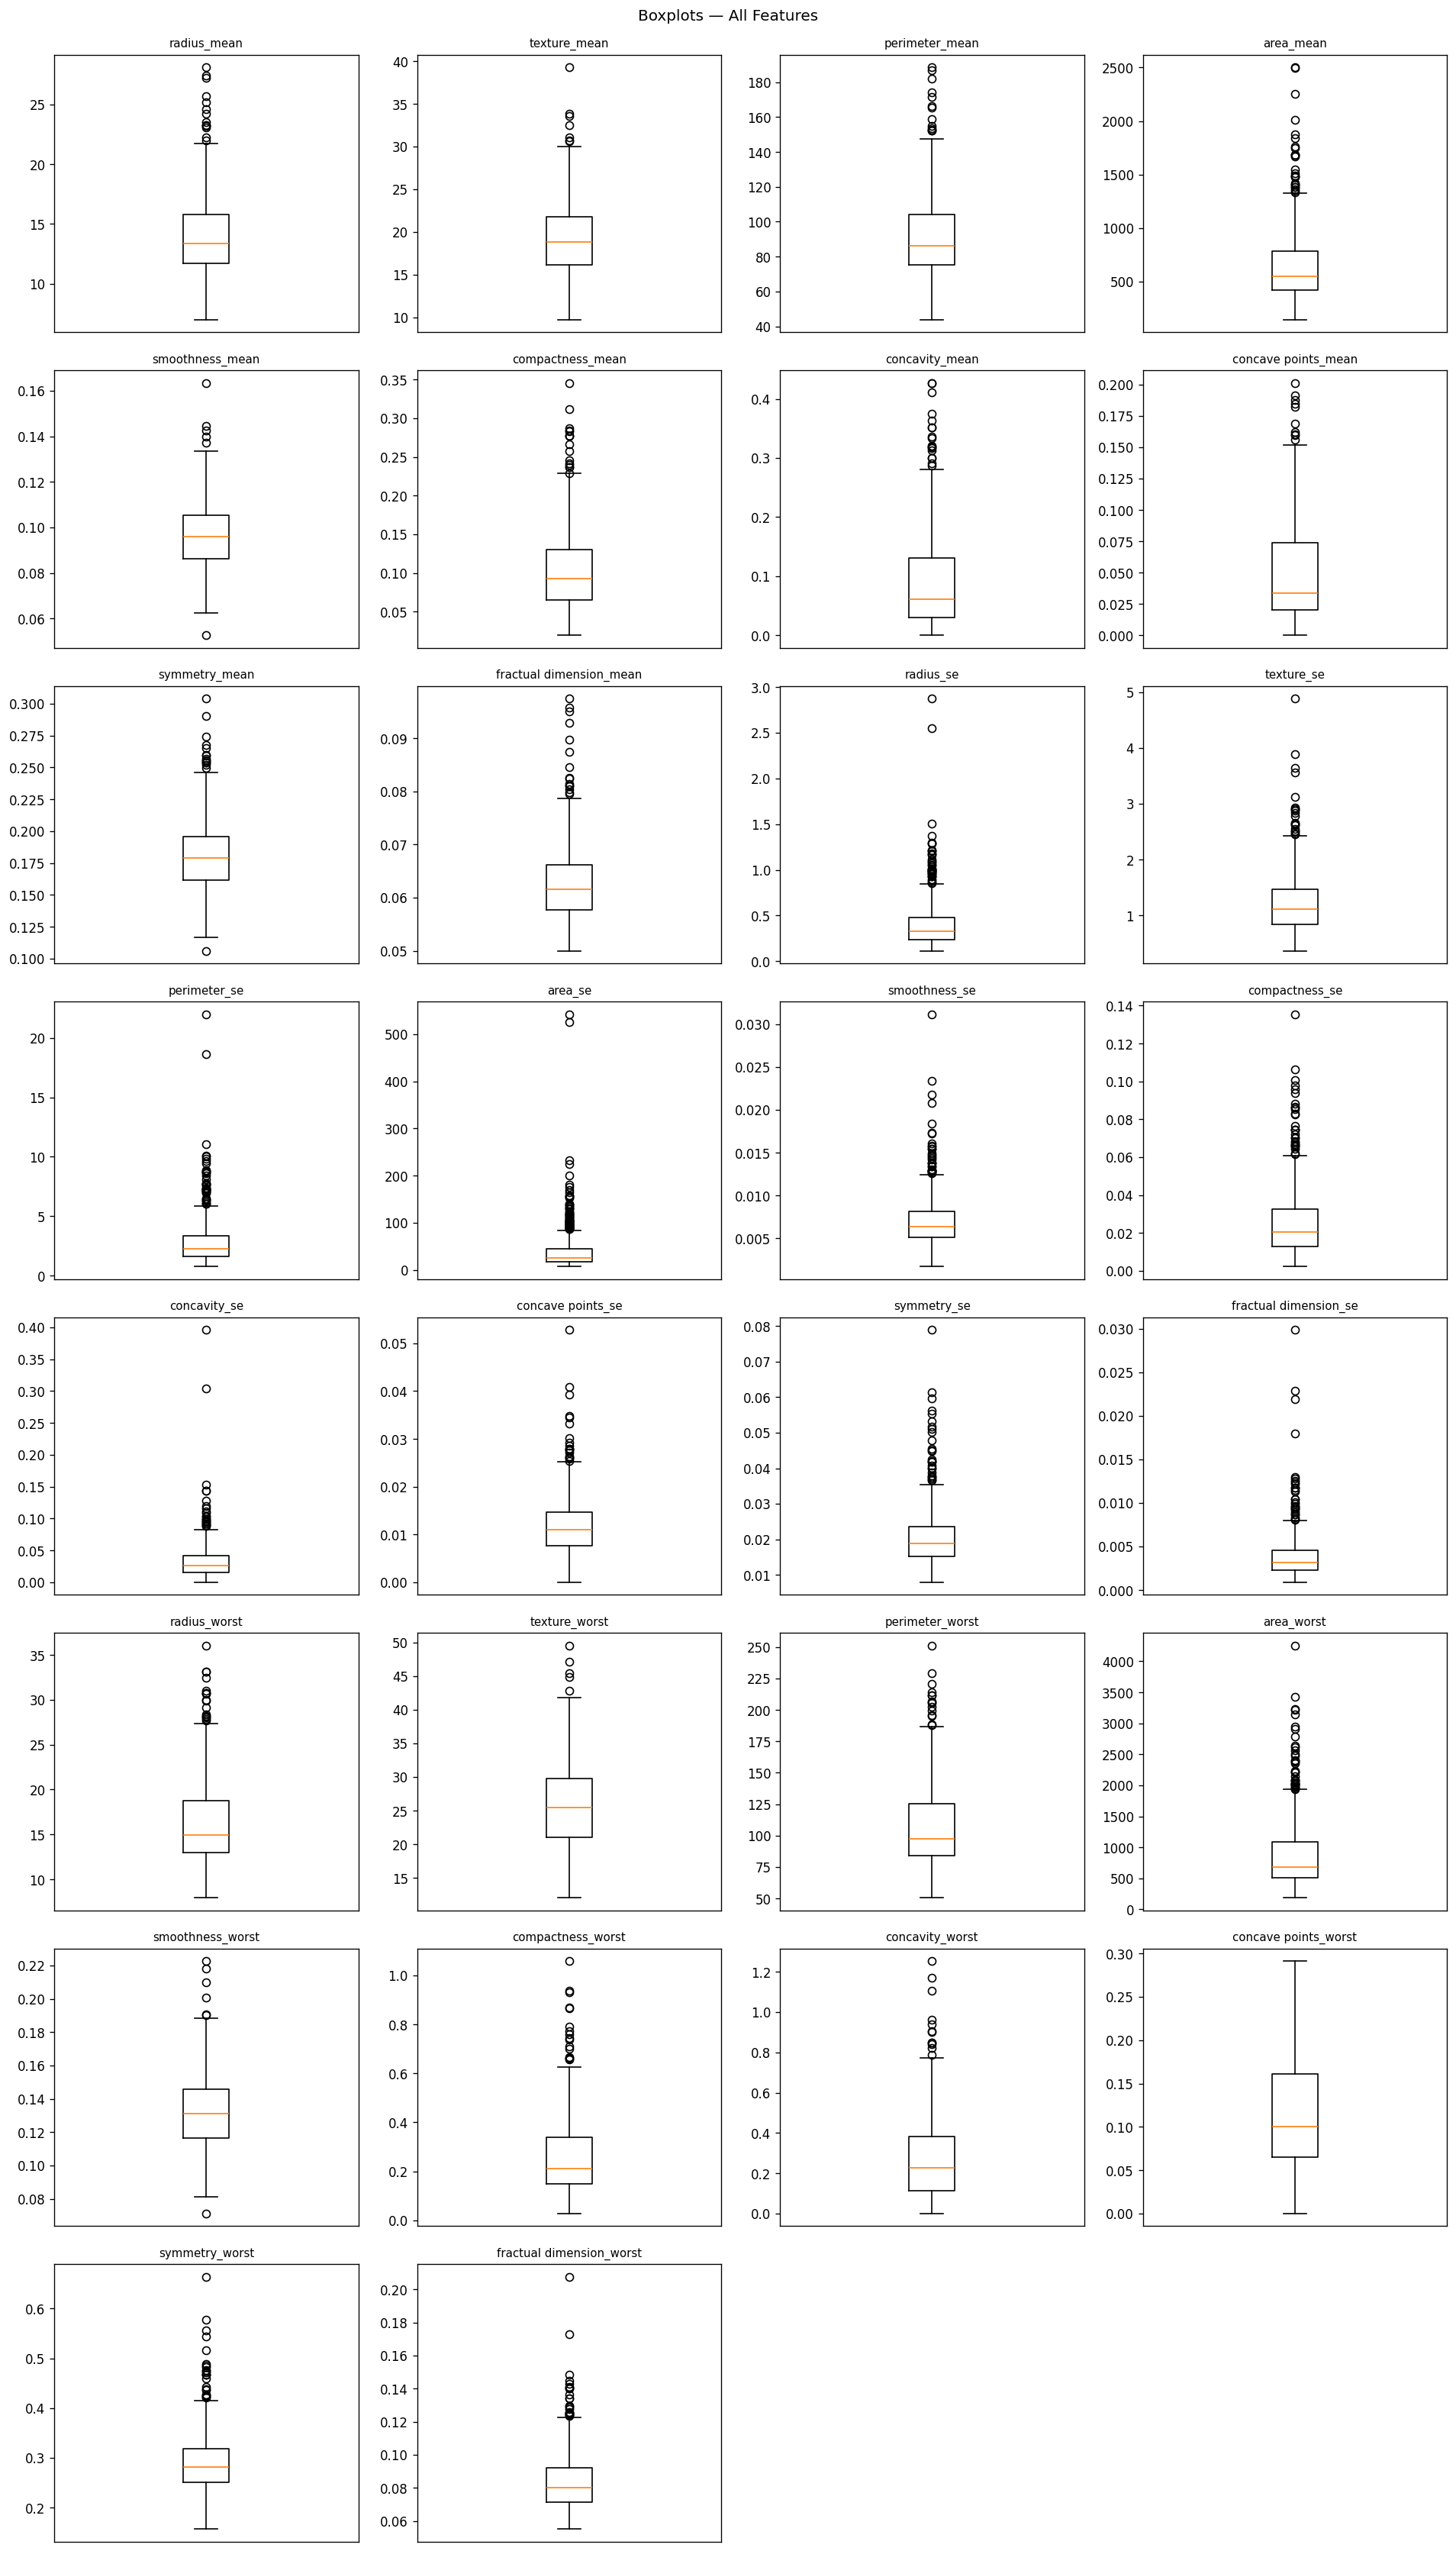

In [5]:
feature_cols = [c for c in df.columns if c != diag_col]
X_raw = df[feature_cols].copy()

# All features
n_feats = len(feature_cols)
n_cols = 4
n_rows = int(np.ceil(n_feats / n_cols))

plt.figure(figsize=(16, 3.5*n_rows))
for i, col in enumerate(feature_cols, start=1):
    ax = plt.subplot(n_rows, n_cols, i)
    ax.boxplot(X_raw[col].dropna())
    ax.set_title(col, fontsize=9)
    ax.set_xticks([])
plt.suptitle("Boxplots — All Features", y=0.995)
plt.tight_layout()
plt.show()


### First 10 feature blocks

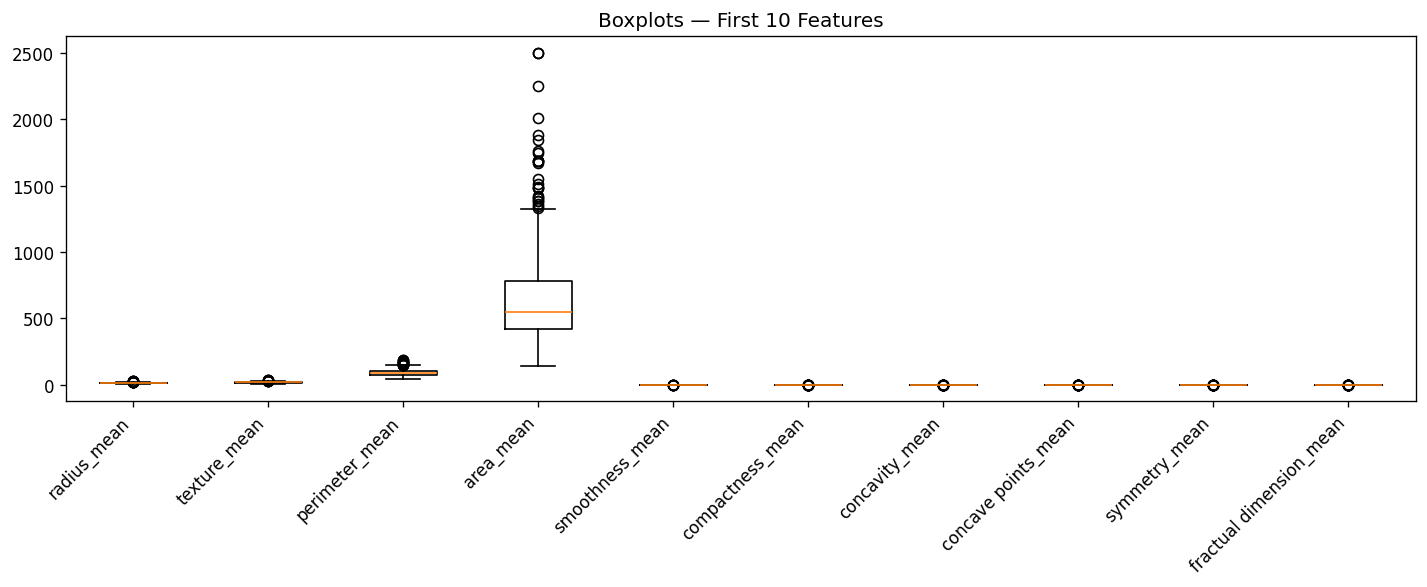

In [6]:
subset_cols = feature_cols[:10]
plt.figure(figsize=(12,5))
plt.boxplot([X_raw[c].dropna() for c in subset_cols])
plt.xticks(range(1, len(subset_cols)+1), subset_cols, rotation=45, ha="right")
plt.title("Boxplots — First 10 Features")
plt.tight_layout()
plt.show()


### Per class boxplot

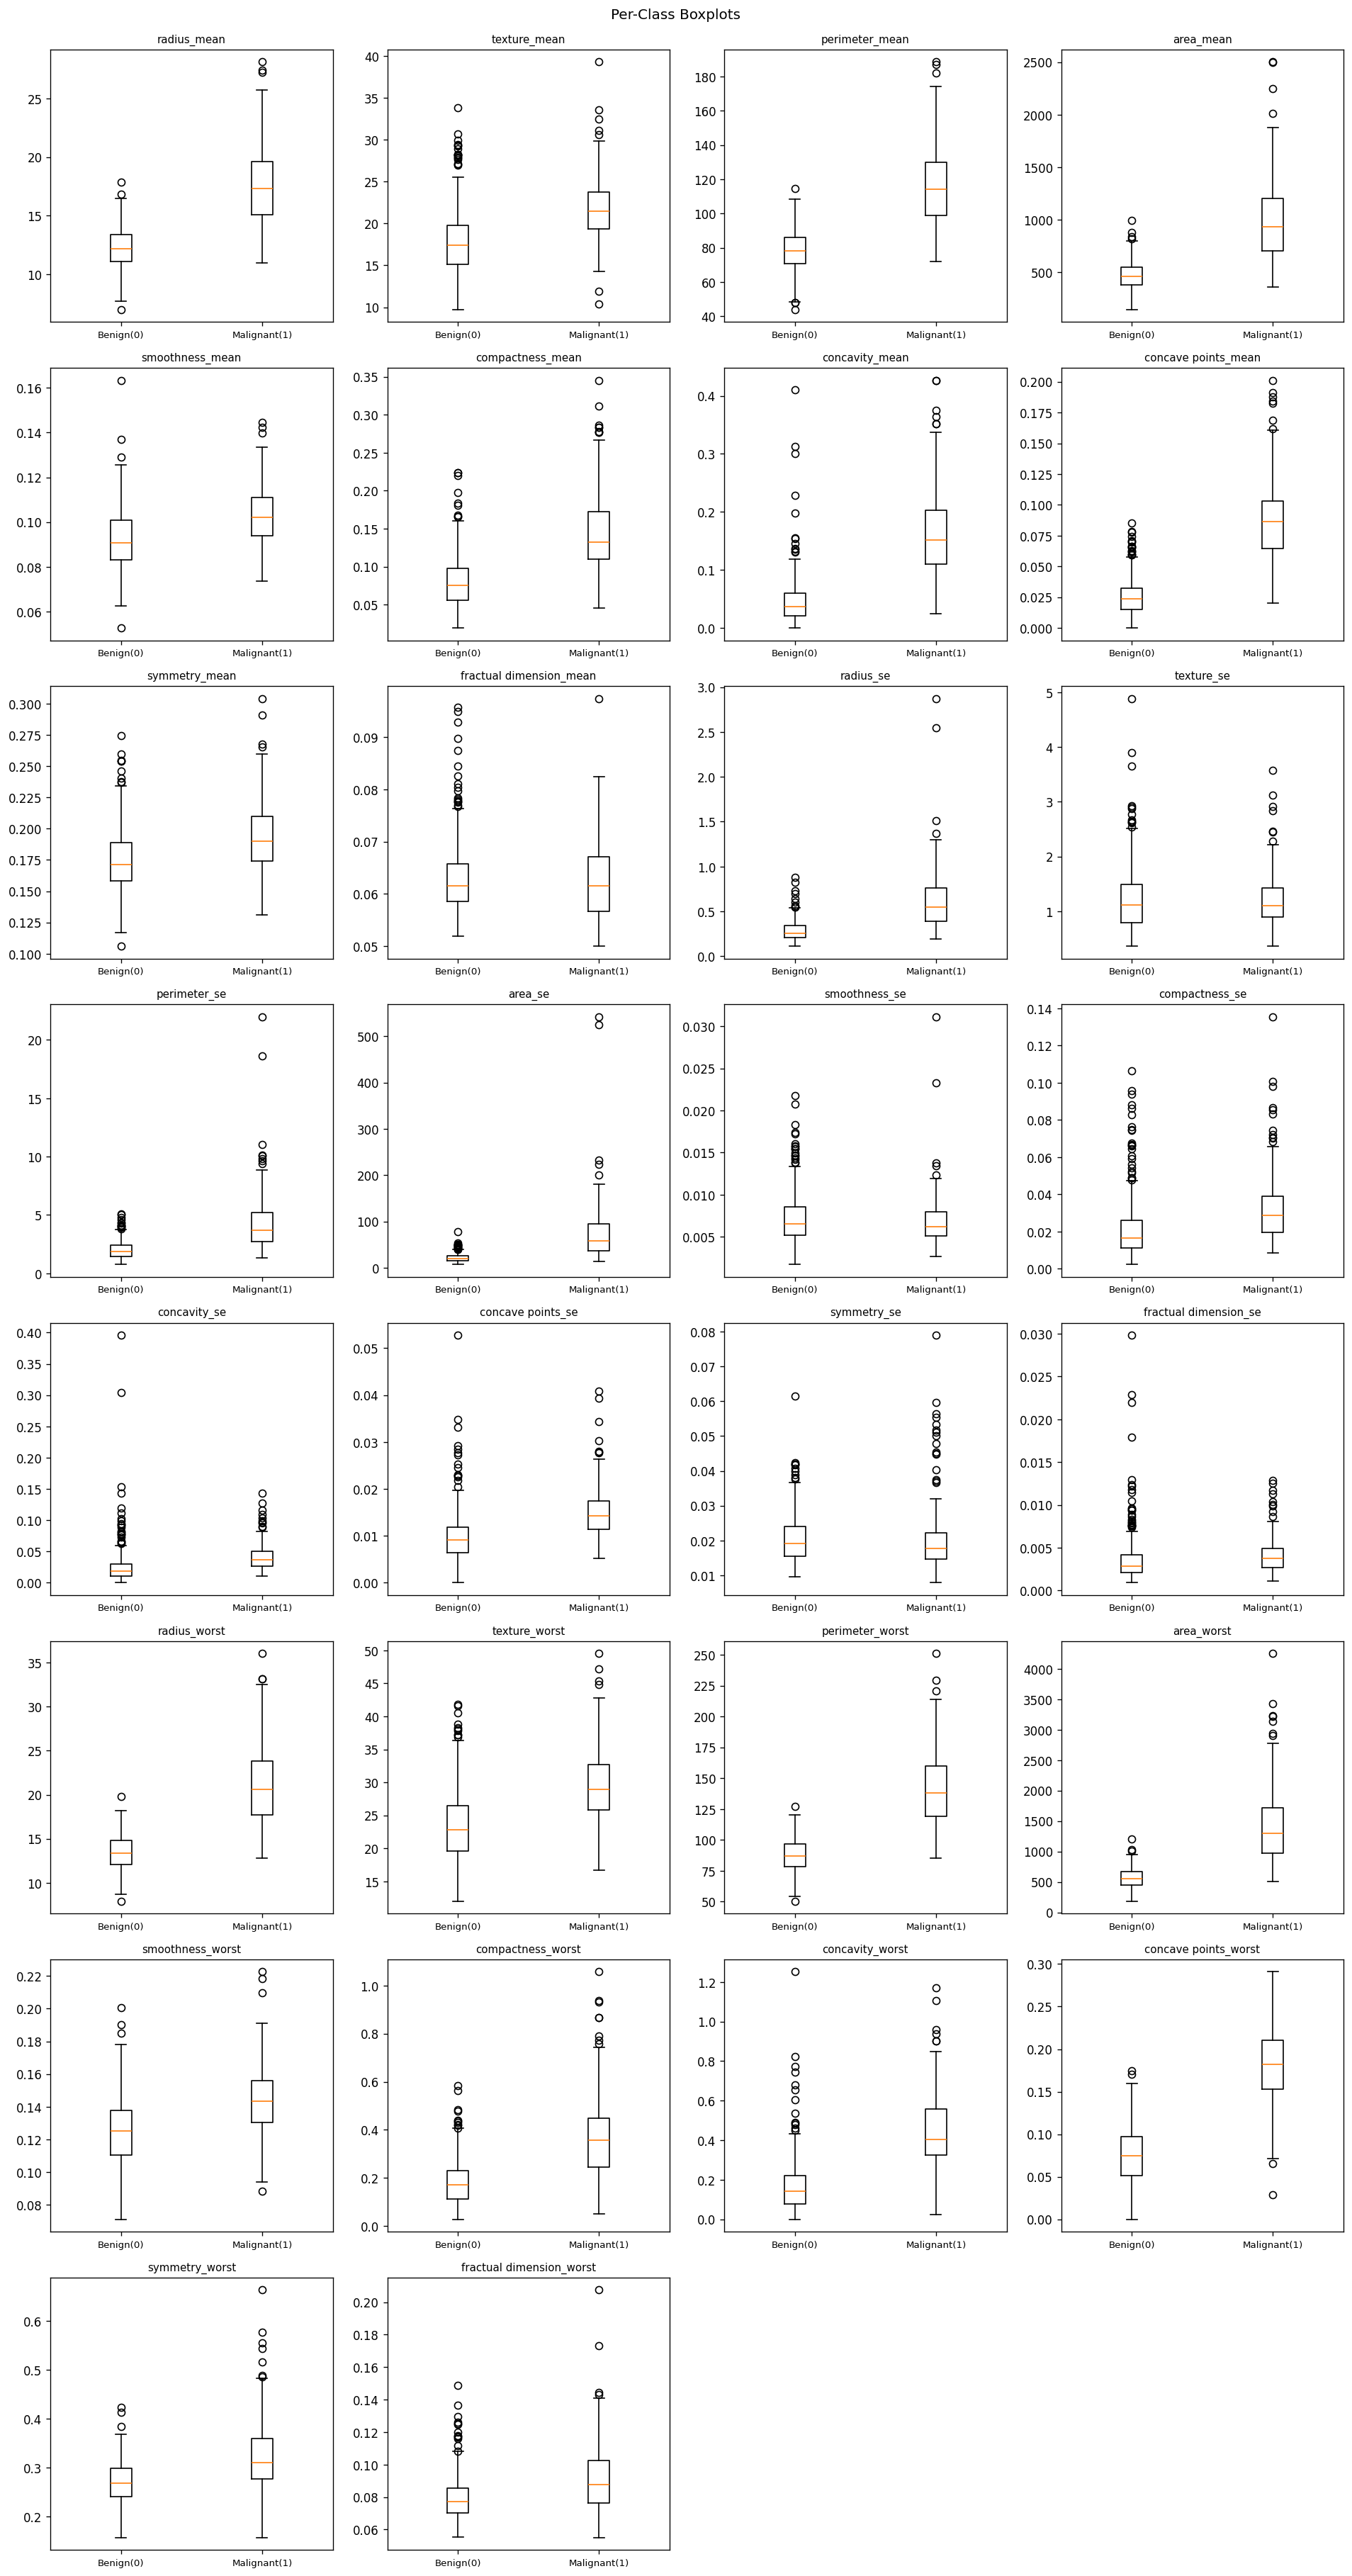

In [7]:
plt.figure(figsize=(16, 3.8*n_rows))
for i, col in enumerate(feature_cols, start=1):
    ax = plt.subplot(n_rows, n_cols, i)
    ax.boxplot([X_raw.loc[y==0, col].dropna(), X_raw.loc[y==1, col].dropna()])
    ax.set_xticks([1,2])
    ax.set_xticklabels(["Benign(0)", "Malignant(1)"], fontsize=8)
    ax.set_title(col, fontsize=9)
plt.suptitle("Per-Class Boxplots", y=0.995)
plt.tight_layout()
plt.show()


### Correlation Matrix

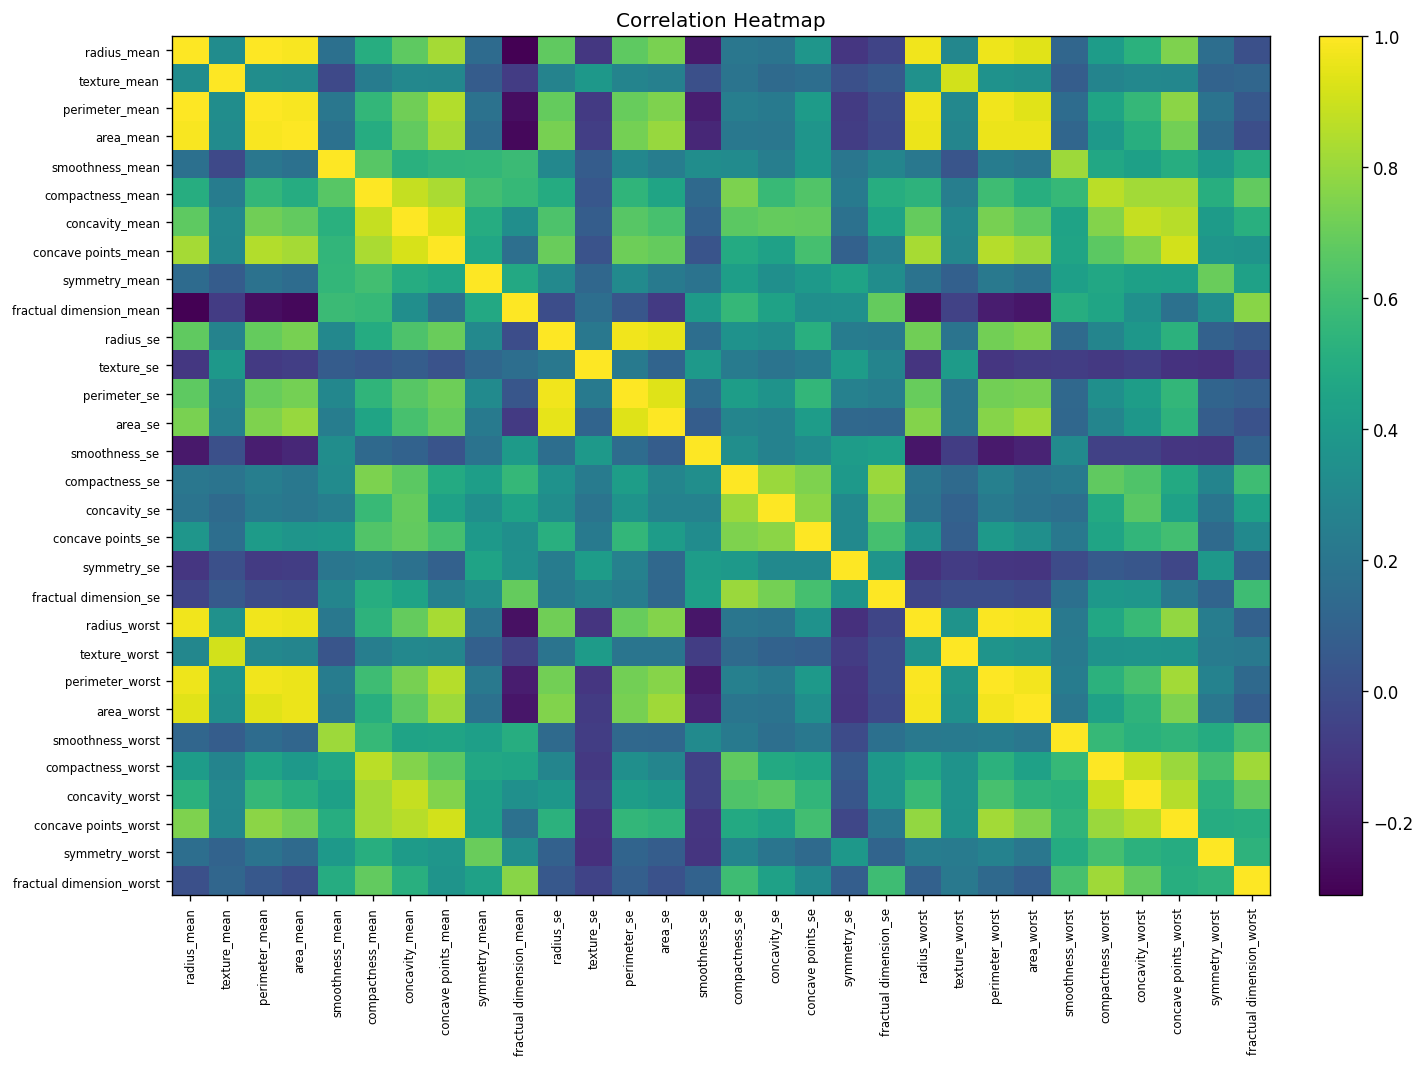

In [8]:
corr = X_raw.corr()
plt.figure(figsize=(12,9))
im = plt.imshow(corr.values, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=7)
plt.yticks(range(len(corr.index)), corr.index, fontsize=7)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


### Scatter matrix (first 10)

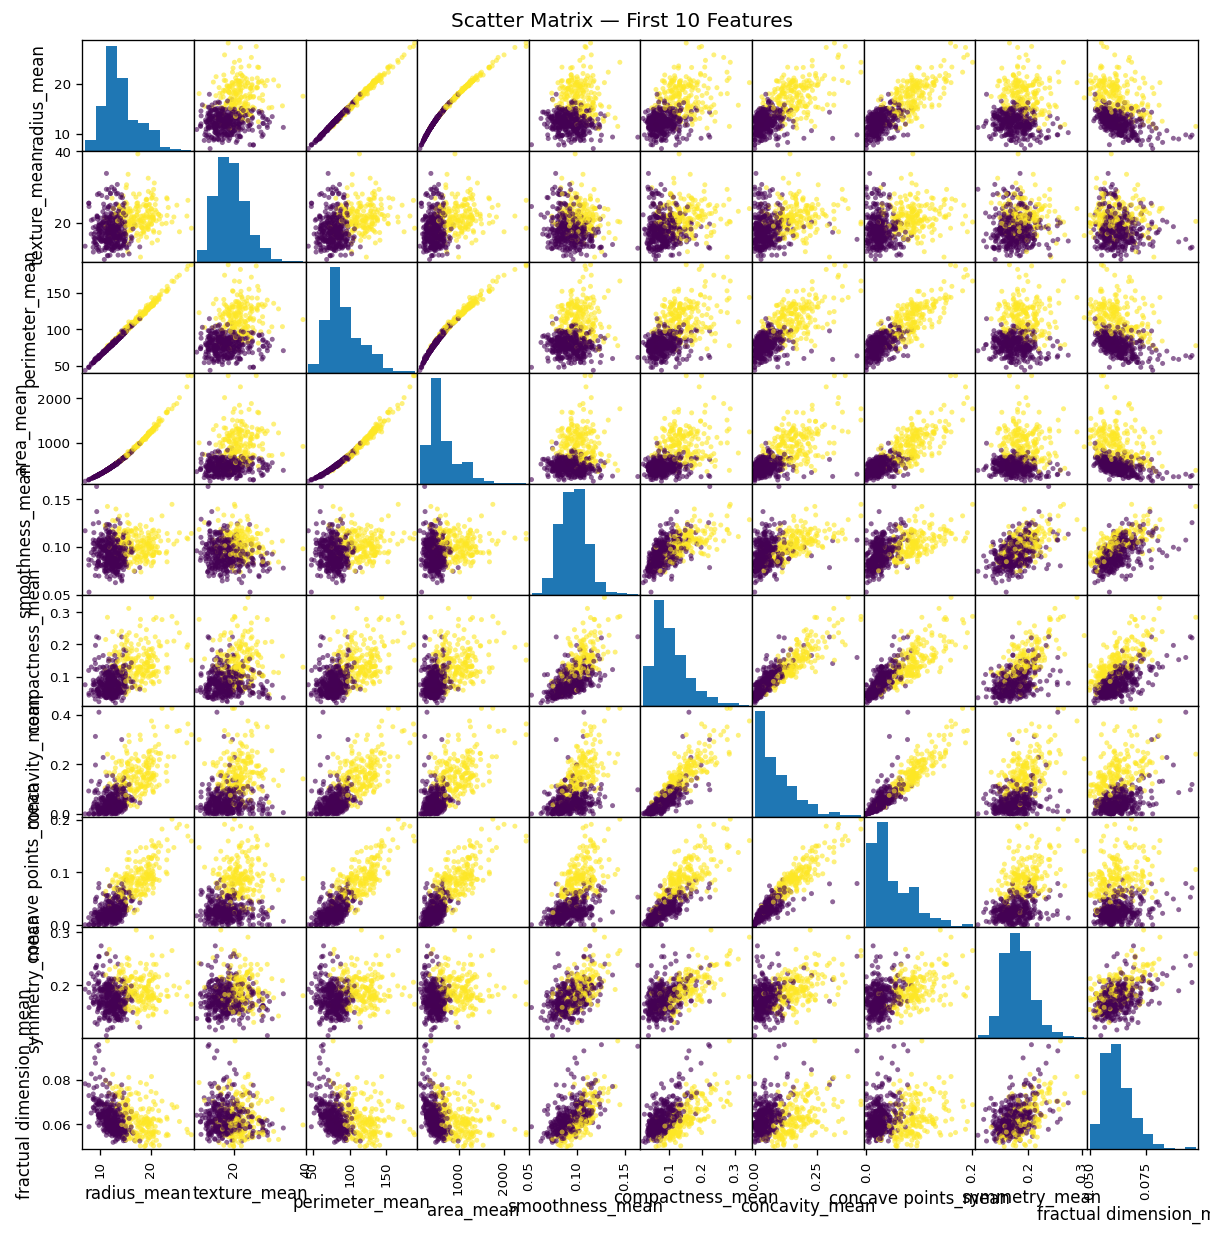

In [9]:
scatter_matrix(X_raw[subset_cols], figsize=(12,12), alpha=0.6, diagonal='hist', c=y)
plt.suptitle("Scatter Matrix — First 10 Features", y=0.9)
plt.show()


### Standardize features

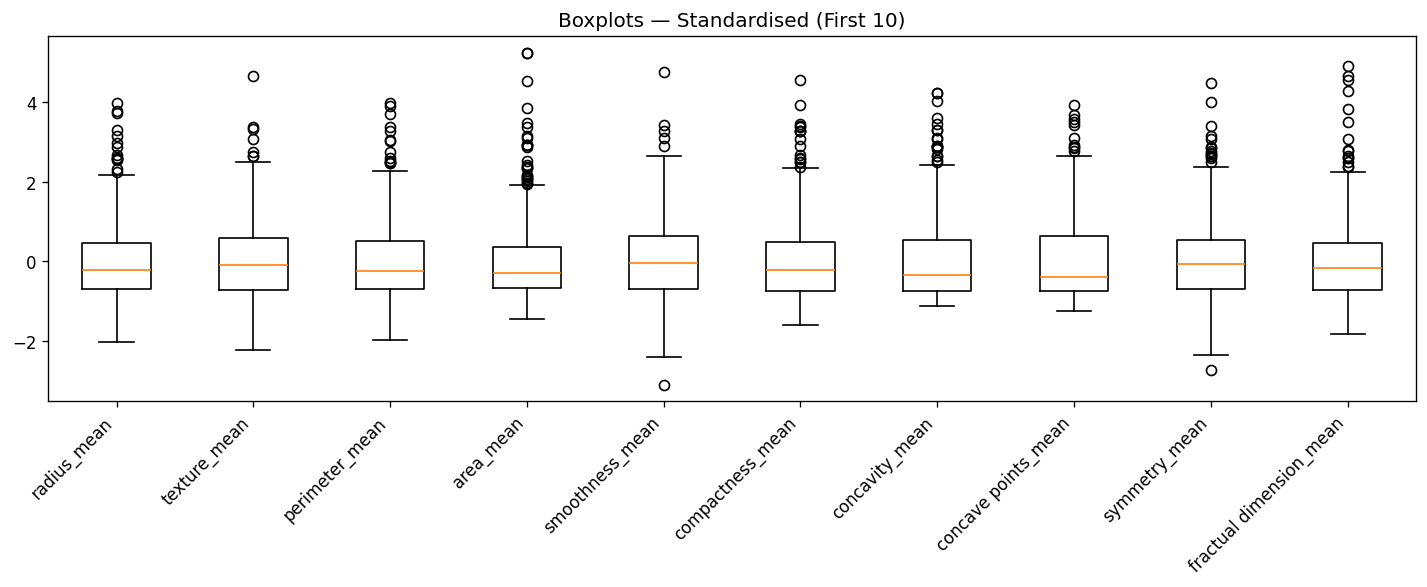

In [10]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X_raw)
Xs_df = pd.DataFrame(Xs, columns=feature_cols)

# Boxplot
plt.figure(figsize=(12,5))
plt.boxplot([Xs_df[c] for c in subset_cols])
plt.xticks(range(1, len(subset_cols)+1), subset_cols, rotation=45, ha="right")
plt.title("Boxplots — Standardised (First 10)")
plt.tight_layout()
plt.show()


### PCA

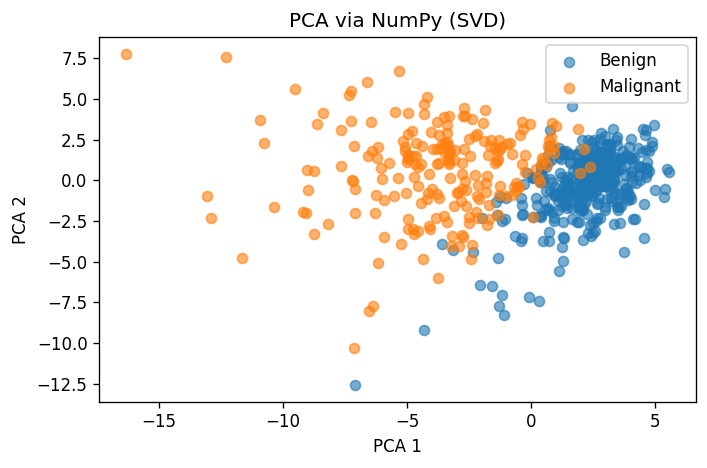

In [11]:
Xs_centered = Xs - Xs.mean(axis=0)
U, s, Vt = np.linalg.svd(Xs_centered, full_matrices=False)
X2D = Xs_centered @ Vt.T[:, :2]

plt.scatter(X2D[y==0,0], X2D[y==0,1], label="Benign", alpha=0.6)
plt.scatter(X2D[y==1,0], X2D[y==1,1], label="Malignant", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA via NumPy (SVD)")
plt.legend()
plt.tight_layout()
plt.show()


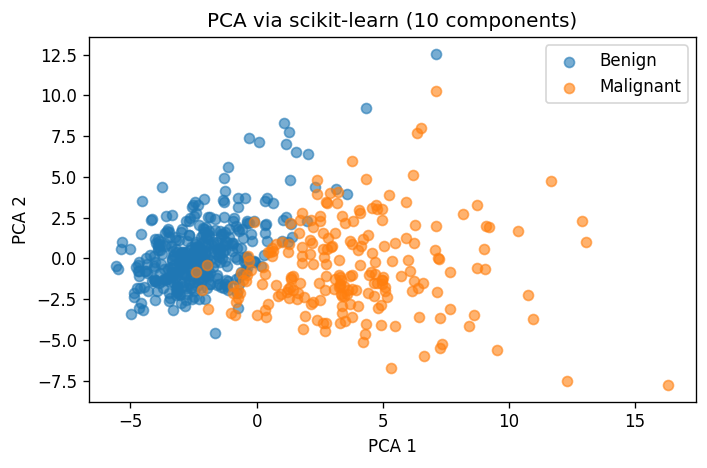

In [12]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(Xs)

plt.scatter(X_pca[y==0,0], X_pca[y==0,1], label="Benign", alpha=0.6)
plt.scatter(X_pca[y==1,0], X_pca[y==1,1], label="Malignant", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA via scikit-learn (10 components)")
plt.legend()
plt.tight_layout()
plt.show()


Number of PCs to retain ≥95% variance: 10


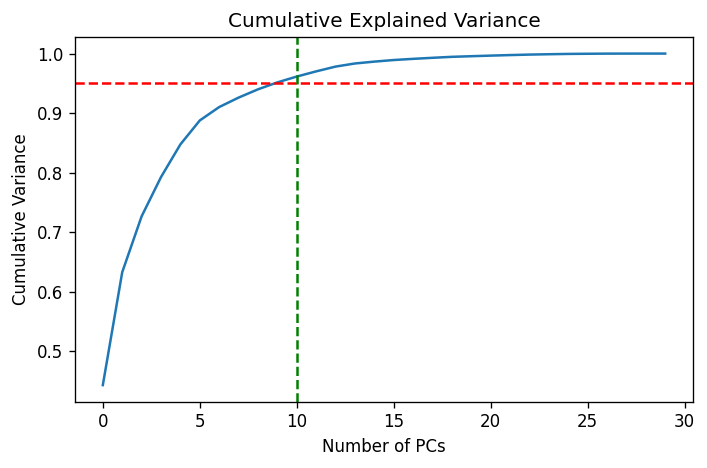

In [13]:
pca_all = PCA()
pca_all.fit(Xs)

cumsum = np.cumsum(pca_all.explained_variance_ratio_)
d_95 = np.argmax(cumsum >= 0.95) + 1
print("Number of PCs to retain ≥95% variance:", d_95)

plt.plot(cumsum)
plt.axhline(0.95, linestyle="--", color="red")
plt.axvline(d_95, linestyle="--", color="green")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Variance")
plt.tight_layout()
plt.show()


In [14]:
pca_final = PCA(n_components=0.95)
X_reduced = pca_final.fit_transform(Xs)

reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])
reduced_df["Diagnosis"] = y.values
reduced_df.to_csv("/content/WDBC_PCA_95.csv", index=False)
print("Saved reduced dataset: /content/WDBC_PCA_95.csv")

# from google.colab import files
# files.download("/content/WDBC_PCA_95.csv")


Saved reduced dataset: /content/WDBC_PCA_95.csv
